In [2]:
import numpy as np

In [3]:
def TDMA(a,b,c,d,n):
    def p(index):
        if(index==1):
            return -c(1)/a(1)
        elif(index==n):
            return 0
        else:
            return -c(index)/(a(index)+b(index)*p(index-1))
        
    def q(index):
        if(index==1):
            return d(1)/a(1)
        else:
            return (d(index)-b(index)*q(index-1))/(a(index)+b(index)*p(index-1))
    
    x = np.zeros(n)
    x[n-1] = q(n)
    for i in range(n-1,2,-1):
        print(p(i),q(i))
        x[i-1] = p(i) * x[i] + q(i)
    x[0] = p(1)*x[1]+q(1)
    return x

In [4]:
def a(n):
    return 2

def b(n):
    if(n==1):
        return 0
    else:
        return -1
    
def c(n):
    if(n==5):
        return 0
    else:
        return -1
    
def d(n):
    if(n==5):
        return 6
    else:
        return 0
    
TDMA(a,b,c,d,5)

: 

: 

In [1]:
import sympy

In [9]:
x = sympy.symbols('x')
a,b,c,d = sympy.symbols('a b c d')
# 24.141e-6 * pow(10, 247.8 / (T - 140))
f = a*b**(c/(x-d))

df = sympy.diff(f,x)

In [11]:
df/f

-c*log(b)/(-d + x)**2

In [18]:
T, P = sympy.symbols('T P')

mu_l = sympy.Function('mu_l')(T,P)
rho_l = sympy.Function('rho_l')(T,P)

nu_l = mu_l/rho_l
dnu_l = sympy.diff(nu_l,T)

In [21]:
dnu_l

-mu_l(T, P)*Derivative(rho_l(T, P), T)/rho_l(T, P)**2 + Derivative(mu_l(T, P), T)/rho_l(T, P)

In [24]:
nu_l,nu_v,S = sympy.symbols('nu_l nu_v S')
k_rl = sympy.Function('k_rl')(S)
k_rv = sympy.Function('k_rv')(S)

nu = 1 / (k_rl/nu_l + k_rv/nu_v)
dnu = sympy.diff(nu,S)

In [25]:
dnu

(-Derivative(k_rv(S), S)/nu_v - Derivative(k_rl(S), S)/nu_l)/(k_rv(S)/nu_v + k_rl(S)/nu_l)**2

In [26]:
nu**2

(k_rv(S)/nu_v + k_rl(S)/nu_l)**(-2)

In [1]:
import numpy as np

In [15]:
def lg(phi,x):
    d = np.array([[x[0]-x[1]],
                  [x[2]-x[1]]])
    dt = np.transpose(d)
    g = np.dot(dt,d)
    dphi = np.array([[phi[0]-phi[1]],
                     [phi[2]-phi[1]]])
    return np.dot(dt,dphi)/g

In [25]:
def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

x = np.array([1,2,3])
phi = f(x)

lg(phi,x)[0][0],df(x[1])

(-0.35017548837401463, -0.4161468365471424)

In [15]:
def rho_l(T,P):
  return 998.0
def drho_ldT(T,P):
  return 0
def mu_l(T,P):
  return 24.141e-6 * 10**(247.8 / (T - 140))
def dmu_ldT(T,P):
  return -mu_l(T,P)*247.8/(T-140)**2*np.log(10)
def nu_l(T,P):
  return mu_l(T,P)/rho_l(T,P)
def dnu_ldT(T,P):
  return (dmu_ldT(T,P)*rho_l(T,P)-mu_l(T,P)*drho_ldT(T,P))/rho_l(T,P)**2
def k_l(T,P):
  return 0.68
def dk_ldT(T,P):
  return 0
def cp_l(T,P):
  return 4182.0
def dcp_ldT(T,P):
  return 0

def rho_v(T,P):
  R, M = 8.314, 18
  return P/(T*R/M*1000)
def drho_vdT(T,P):
  return -rho_v(T,P)/T
def mu_v(T,P):
  a0 = -2.77567e-6
  a1 = 0.04035e-6
  return a0+a1*T
def dmu_vdT(T,P):
  return 0.04035e-6
def nu_v(T,P):
  return mu_v(T,P)/rho_v(T,P)
def dnu_vdT(T,P):
  return (dmu_vdT(T,P)*rho_v(T,P)-mu_v(T,P)*drho_vdT(T,P))/rho_v(T,P)**2
def k_v(T,P):
  a0 = -21.994433e-3
  a1 = 0.11842e-3
  return a0 + a1 * T
def dk_vdT(T,P):
  return 0.11842e-3
def cp_v(T,P):
  return 2030.0
def dcp_vdT(T,P):
  return 0

def rho_s(T):
  return 8.4e3
def k_s(T):
  return 21.7
def cp_s(T):
  return 625

def T_sat(P):
  p=P/1e6
  a0 = 429.69474687605754
  a1 = 11.983108526790891
  a2 = -0.2940193901122584
  a3 = 25.197563642164386
  return a0 + a1 * p + a2 * p**2 + a3 * np.log(p)
def dT_satdP(P):
  p=P/1e6
  a1 = 11.983108526790891
  a2 = -0.2940193901122584
  a3 = 25.197563642164386
  return (a1 + 2 * a2 * p + a3 / p) / 1e6
def h_fg(P):
	T = T_sat(P)
	a0 = -2511.1589762597114
	a1 = 1.790037469059945
	a2 = 0.0028969464729942194
	a3 = 222.03437607975306
	return a0 + a1 * T + a2 * T**2 + a3 * np.sqrt(650 - T)
def h_l_sat(P):
  T=T_sat(P)
  return cp_l(T,P)*T
def h_v_sat(P):
  return h_l_sat(P)+h_fg(P)

def h_to_T(h,P):
  h_m_s1=h_l_sat(P)
  h_m_s0=h_v_sat(P)
  T=T_sat(P)
  if(h<h_m_s1):
    return h/cp_l(T,P)
  elif(h>h_m_s0):
    return T+(h-h_m_s0)/cp_v(T,P)
  else:
    return T
def h_to_S(h,P):
  h_m_s1=h_l_sat(P)
  h_m_s0=h_v_sat(P)
  T=T_sat(P)
  if(h<=h_m_s1):
    return 1
  elif(h>=h_m_s0):
    return 0
  else:
    nu_r,h_r = nu_v(T,P)/nu_l(T,P), h_fg(P)/(h_m_s0-h)
    return 1/((nu_r*(h_r-1))**(0.33)+1)

def k_rl(S):
  return S**3
def dk_rldS(S):
  return 3*S**2
def k_rv(S):
  return (1-S)**3
def dk_rvdS(S):
  return -3*(1-S)**2
def rho(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return rho_l(T,P)
  elif(h>=h_s0):
    return rho_v(T,P)
  else:
      return rho_l(T,P)*S+rho_v(T,P)*(1-S)
def drhodS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 0
  else:
    return rho_l(T,P) - rho_v(T,P)
def nu(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return nu_l(T,P)
  elif(h>=h_s0):
    return nu_v(T,P)
  else:
    return 1/(k_rl(S)/nu_l(T,P)+k_rv(S)/nu_v(T,P))
def dnudS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 0
  else:
    return -nu(h,P)**2*(dk_rldS(S)/nu_l(T,P)+dk_rvdS(S)/nu_v(T,P))
def mu(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return mu_l(T,P)
  elif(h>=h_s0):
    return mu_v(T,P)
  else:
    return nu(h,P)*rho(h,P)
def dmudS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 0
  else:
    return drhodS(h,P)*nu(h,P)+rho(h,P)*dnudS(h,P)
def cp(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return cp_l(T,P)
  elif(h>=h_s0):
    return cp_v(T,P)
  else:
    return (S*rho_l(T,P)*cp_l(T,P)+(1-S)*rho_v(T,P)*cp_v(T,P))/rho(h,P)
def dcpdS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 0
  else:
    return (rho_l(T,P)*cp_l(T,P)-rho_v(T,P)*cp_v(T,P)-cp(h,P)*drhodS(h,P)) / rho(h,P)
def k(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1):
    return k_l(T,P)
  elif(h>=h_s0):
    return k_v(T,P)
  else:
    return S*k_l(T,P)+(1-S)*k_v(T,P)
def dkdS(h,P):
  h_s1 = h_l_sat(P)
  h_s0 = h_v_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (k>=h_s0):
    return 0
  else:
    return k_l(T,P)-k_v(T,P)
  
def lam(h,P):
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  return k_rl(S)*nu(h,P)/nu_l(T,P)
def dlamdS(h,P):
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  return (dk_rldS(S)*nu(h,P)+k_rl(S)*dnudS(h,P))/nu_l(T,P)
  
def Re_l(T,P,v,D):
  return v*D/nu_l(T,P)
def dRe_ldT(T,P,v,D):
  return v*D/nu_l(T,P)**2*dnu_ldT(T,P)
def Re_v(T,P,v,D):
  return v*D/nu_v(T,P)
def dRe_vdT(T,P,v,D):
  return v*D/nu_v(T,P)**2*dnu_vdT(T,P)
def Pr_l(T,P):
  return mu_l(T,P)*cp_l(T,P)/k_l(T,P)
def dPr_ldT(T,P):
  return (dmu_ldT(T,P)*cp_l(T,P)+mu_l(T,P)*dcp_ldT(T,P)-Pr_l(T,P)*dk_ldT(T,P))/k_l(T,P)
def Pr_v(T,P):
  return mu_v(T,P)*cp_v(T,P)/k_v(T,P)
def dPr_vdT(T,P):
  return (dmu_vdT(T,P)*cp_v(T,P)+mu_v(T,P)*dcp_vdT(T,P)-Pr_l(T,P)*dk_ldT(T,P))/k_l(T,P)
def Nu_l(T,P,v,D):
  return 2+1.1*Pr_l(T,P)**0.33*Re_l(T,P,v,D)**0.6
def dNu_ldT(T,P,v,D):
  return 1.1*(0.33*Pr_l(T,P)**-0.67*dPr_ldT(T,P)*Re_l(T,P,v,D)**0.6+0.6*Pr_l(T,P)**0.33*Re_l(T,P,v,D)**-0.4*dRe_ldT(T,P,v,D))
def Nu_v(T,P,v,D):
  return 2+1.1*Pr_v(T,P)**0.33*Re_v(T,P,v,D)**0.6
def dNu_vdT(T,P,v,D):
  return 1.1*(0.33*Pr_v(T,P)**-0.67*dPr_vdT(T,P)*Re_v(T,P,v,D)**0.6+0.6*Pr_v(T,P)**0.33*Re_v(T,P,v,D)**-0.4*dRe_vdT(T,P,v,D))
def h_sl(T,P,v,D):
  return Nu_l(T,P,v,D)*k_l(T,P)/D
def dh_sldT(T,P,v,D):
  return (dNu_ldT(T,P,v,D)*k_l(T,P)+Nu_l(T,P,v,D)*dk_ldT(T,P))/D
def h_sv(T,P,v,D):
  return Nu_v(T,P,v,D)*k_v(T,P)/D
def dh_svdT(T,P,v,D):
  return (dNu_vdT(T,P,v,D)*k_v(T,P)+Nu_v(T,P,v,D)*dk_vdT(T,P))/D
def qsf_l(T,P,v,T_s,D,alpha_sf):
  return h_sl(T,P,v,D)*alpha_sf*(T_s-T)
def dqsf_ldT(T,P,v,T_s,D,alpha_sf):
  return dh_sldT(T,P,v,D)*alpha_sf*(T_s-T)-h_sl(T,P,v,D)*alpha_sf
def dqsf_ldT_s(T,P,v,T_s,D,alpha_sf):
  return h_sl(T,P,v,D)*alpha_sf
def qsf_v(T,P,v,T_s,D,alpha_sf):
  return h_sv(T,P,v,D)*alpha_sf*(T_s-T)
def dqsf_vdT(T,P,v,T_s,D,alpha_sf):
  return dh_svdT(T,P,v,D)*alpha_sf*(T_s-T)-h_sv(T,P,v,D)*alpha_sf
def dqsf_vdT_s(T,P,v,T_s,D,alpha_sf):
  return h_sv(T,P,v,T_s,D)*alpha_sf
def q_boil(h,P,T_s,alpha_sf):
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  return S*alpha_sf*mu(h,P)*h_fg(P)*np.sqrt(9.81*(rho_l(T,P)-rho_v(T,P))/0.072)*(cp_l(T,P)*(T_s - T_sat(P))/0.006/h_fg(P))**3*Pr_l(T,P)**(-1.7/0.33)
def dq_boildS(h,P,T_s,alpha_sf):
  S = h_to_S(h,P)
  return q_boil(h,P,T_s,alpha_sf) * (1/S + dmudS(h,P)/mu(h,P))
def dq_boildT_s(h,P,T_s,alpha_sf):
  return q_boil(h,P,T_s,alpha_sf) * 3 / (T_s - T_sat(P))
def qsf(h,P,v,T_s,D,alpha_sf):
  h_m_s0 = h_v_sat(P)
  h_m_s1=h_l_sat(P)
  T = h_to_T(h,P)
  if(h<=h_m_s1):
    return qsf_l(T,P,v,T_s,D,alpha_sf)
  elif(h>=h_m_s0):
    return qsf_v(T,P,v,T_s,D,alpha_sf)
  else:
    s = h_to_S(h,P)
    return q_boil(h,P,T_s,alpha_sf)+(1-s)*h_sv(T,P,v,D)*alpha_sf*(T_s-T)
def dqsfdT(h,P,v,T_s,D,alpha_sf):
  h_s0 = h_v_sat(P)
  h_s1 = h_l_sat(P)
  T = h_to_T(h,P)
  if(h<=h_s1):
    return dqsf_ldT(T,P,v,T_s,D,alpha_sf)
  elif(h>=h_s0):
    return dqsf_vdT(T,P,v,T_s,D,alpha_sf)
  else:
    S = h_to_S(h,P)
    return dq_boildS(h,P,T_s,alpha_sf) - h_sv(T,P,v,D)*alpha_sf*(T_s-T)
def dqsfdT_s(h,P,v,T_s,D,alpha_sf):
  h_s0 = h_v_sat(P)
  h_s1 = h_l_sat(P)
  T = h_to_T(h,P)
  if(h<=h_s1):
    return dqsf_ldT_s(T,P,v,T_s,D,alpha_sf)
  elif(h>=h_s0):
    return dqsf_vdT_s(T,P,v,T_s,D,alpha_sf)
  else:
    S = h_to_S(h,P)
    return dq_boildT_s(h,P,T_s,alpha_sf) - (1-S)*h_sv(T,P,v,D)*alpha_sf


def h_inject(h,P,v,D):
  h_s0 = h_v_sat(P)
  h_s1 = h_l_sat(P)
  T = h_to_T(h,P)
  if(h<=h_s1):
    return h_sl(T,P,v,D)
  elif(h>=h_s0):
    return h_sv(T,P,v,D)
  else:
    S = h_to_S(h,P)
    return S * h_sl(T,P,v) + (1-S) * h_sv(T,P,v)
def beta(h,P):
  h_s0 = h_v_sat(P)
  h_s1 = h_l_sat(P)
  T = h_to_T(h,P)
  S = h_to_S(h,P)
  if(h<=h_s1) or (h>=h_s0):
    return 1
  else:
    return (rho_v(T,P) / rho(h,P) * (1-S) * h_fg(P) + cp_l(T,P) * T_sat(P)) / ((1-lam(h,P)) * h_fg(P) + cp_l(T_sat(P),P) * T_sat(P))
  


In [3]:
import numpy as np

In [4]:
P = 101325
nu_l(T_sat(P),P), nu_v(T_sat(P),P), nu_l(T_sat(P),P) / nu_v(T_sat(P),P)

(2.7935062274873986e-07, 2.0898349896025438e-05, 0.013367113869687305)

In [144]:
d = 100e-6
alpha_sf = 6*(1-e)/d
m = 0.001
m_flux = m / (0.06*0.06*np.pi/4)


P = 101325
h = (h_l_sat(P)+h_v_sat(P))/2
T_s = T_sat(P)+0.1
v = m_flux / rho(h,P)

q = qsf(h,P,v,T_s,d,alpha_sf)
dq = dqsfdT(h,P,v,T_s,d,alpha_sf)/(-dlamdS(h,P)*h_fg(P))
g = gam.subs(s,h_to_S(h,P))

In [145]:
b = q - dq * h
a = dq
dx = 0.008/2000

In [146]:
b*dx,(g/dx+m_flux/2),(g/dx-m_flux/2),2*g/dx+a*dx

(28804346.23649108, 93.1354694880963, 92.7817918367810, 167.505913384229)

In [148]:
def f(he,hw):
    return -(b*dx-(g/dx+m_flux/2)*he-(g/dx-m_flux/2)*hw)/(2*g/dx+a*dx)

def iter(h,n):
    first = f(h,h)
    r=[(first/h-1)*100]
    nf = f(first,first)
    r.append((nf/h-1)*100)
    for _ in range(n-2):
        nf = f(nf,nf)
        r.append((nf/h-1)*100)
    return r

def iter_c(h,n):
    first = f(h,h)
    r=[(first/h-1)*100]
    nf = f(first,first)
    r.append((nf/first-1)*100)
    for _ in range(n-2):
        last = nf
        nf = f(nf,nf)
        r.append((nf/last-1)*100)
    return r

(f(f(h,h),f(h,h))/f(h,h) - 1) *100

# cr = iter(h,1000)
# ccr = iter_c(h,1000)
# plt.plot(range(1000),cr)

-0.0200270593046281

In [150]:
f(h,h)-h_l_sat(P)

845.405291989679

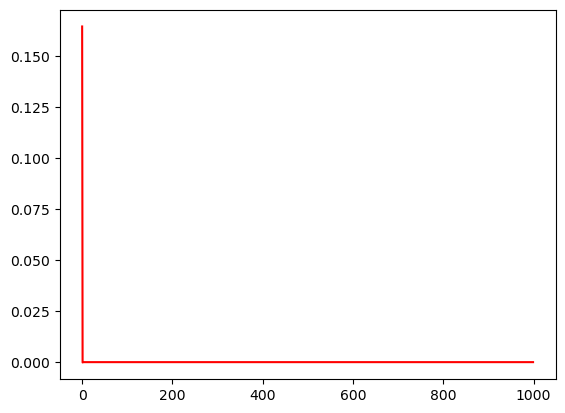

In [121]:
plt.plot(range(1000),ccr,'r')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
K = 3.67e-12
e = 0.3
sigma = 0.072

def dj(S):
    return 1.417-4.240*(1-S)+3.789*(1-S)**2
def D(h,P):
    S = h_to_S(h,P)
    return K/nu(h,P)*lam(h,P)*(1-lam(h,P))*np.sqrt(e/K)*sigma*dj(S)
def gamma(h,P):
    return D(h,P)/dlamdS(h,P)

In [11]:
nu(h_v_sat(P),P)

2.0898349896025438e-05

C:\Users\xowls\AppData\Local\Temp\ipykernel_8052\621821300.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return D(h,P)/dlamdS(h,P)


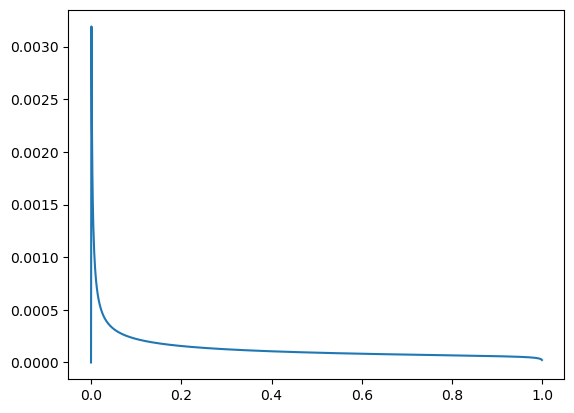

In [13]:
P = 101325
h = np.linspace(h_l_sat(P)+1e-10,h_v_sat(P)-1e-10,1000)
gam = []

for h_ in h:
    gam.append(gamma(h_,P))

plt.plot((h-h_l_sat(P))/h_fg(P),gam)

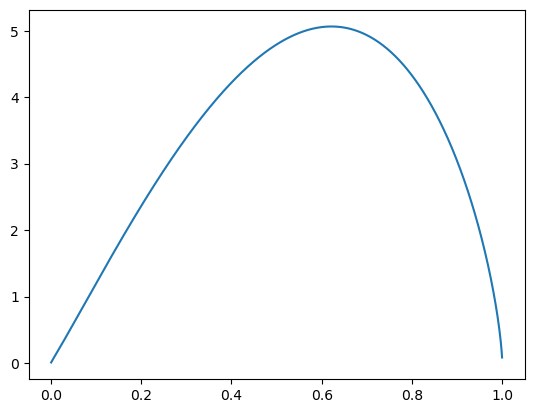

In [8]:
dlds = []
for h_ in h:
    dlds.append(dlamdS(h_,P))
plt.plot((h-h_l_sat(P))/h_fg(P),dlds)

In [ ]:
n_mesh = 1000
x = np.linspace(-0.004,0.004,n_mesh)
cell_centroid = (x[1:]-x[:-1])/2
dx = x[1:]-x[:-1]

u = np.zeros_like(cell_centroid)
p = np.zeros_like(u)
h = np.zeros_like(u)
T_s = np.zeros_like(u)

In [1]:
import numpy as np

In [39]:
def gauss_seidel(A,B,x0,n):
    for _ in range(n):
        for i,row in enumerate(A):
            ap = row[i]
            xp = x0[i]
            x0[i] = (B[i] - (np.dot(row,x0)-ap*xp))/ap
    return x0

In [52]:
s = 10000
A = np.random.randint(1,s,size=(s,s)) - np.identity(s) * 1e10
x = np.random.randint(-s,s,size=s)
B = np.dot(A,x)

x0 = np.zeros(s)

gauss_seidel(A,B,x0,10) - x

MemoryError: Unable to allocate 37.3 GiB for an array with shape (100000, 100000) and data type int32

In [90]:
import numpy as np
from scipy.sparse import csc_matrix

In [102]:
s = 20000

row = np.array([int(i/3) for i in range(s*3-4)])
row = np.append(row,1)
row = np.append(row,2)
row = np.append(row,s-1)
row = np.append(row,s-1)
col = np.array([i%3 + int(i/3) for i in range(s*3-4)])
col = np.append(col,0)
col = np.append(col,1)
col = np.append(col,s-1)
col = np.append(col,s-2)

data = np.array([np.random.randint(10) for i in range(s*3)])
A = csc_matrix((data, (row, col)),
                shape = (s,s)).toarray() - np.identity(s) * 1e20
  
x = np.random.randint(-s,s,size=s)
B = np.dot(A,x)

x0 = np.zeros(s)

y = gauss_seidel(A,B,x0,10) - x

In [103]:
y.sum()

-6.853717593457986e-11

In [104]:
def f(x):
    a11 = 8e10
    a12 = 2
    a13 = 0
    a21 = 2
    a22 = 7e10
    a23 = 1
    a31 = 0
    a32 = -2
    a33 = 9e10

    b1 = 4e11 - 4
    b2 = 11 - 14e10
    b3 = 4 + 54e10

    x1 = (b1 - a12 * x[1] - a13 * x[2]) / a11
    x2 = (b2 - a21 * x1 - a23 * x[2]) / a22
    x3 = (b3 - a31 * x1 - a32 * x2) / a33

    return [x1,x2,x3]

In [105]:
x0 = [0,0,0]

In [106]:
f(x)

[4.999999984975, -1.9999997812285715, 6.0]

In [16]:
from sympy import symbols, Function, diff, simplify
import numpy as np

In [17]:
nu_L = nu_l(T_sat(101325),101325)
nu_V = nu_v(T_sat(101325),101325)
sigma = 0.072
K = 3.67e-12
e = 0.3

In [18]:
s = symbols('s')
j = 1.417*(1-s)-2.12*(1-s)**2+1.263*(1-s)**3
nu_m = 1/(s**3/nu_L + (1-s)**3/nu_V)
l = nu_m*s**3/nu_L
D = -K/nu_m*l*(1-l)*(e/K)**0.5*sigma*diff(j,s)
gam = D / diff(l,s)

In [8]:
simplify(gam)

3.52613107138514e+15*s*(s - 1)**3*(1.31376116648251e-5*s**3 - 1.75611951099449e-7*(s - 1)**3)*(s**3 - 0.0133671138696873*(s - 1)**3)**2*(4.24*s + 3.789*(s - 1)**2 - 2.823)/((3579730.69886242*s**3 - 47850.6678745093*(s - 1)**3)*(2.7935062274874e-7*s*(10739192.0965873*s**2 - 143552.003623528*(1 - s)**2)*(3579730.69886242*s**3 - 47850.6678745093*(s - 1)**3) - 10739192.0965873*(s**3 - 0.0133671138696873*(s - 1)**3)**2))

In [25]:
r = []
P = 101325
h = np.linspace(h_l_sat(P)+1,h_v_sat(P)-1,1000)

m = 0
i = 0

for j,h_ in enumerate(h):
    a = gam.subs(s,h_to_S(h_,P))
    if(m<a):
        m = a
        i = j
    r.append(a)
m

0.00434110304754740

In [26]:
h[i]

1560798.916426558

In [100]:
s_max = S[i]
P = 101325
l_max = k_rl(s_max)/nu_l(T_sat(P),P) * (1/(k_rl(s_max)/nu_l(T_sat(P),P)+k_rv(s_max)/nu_v(T_sat(P),P)))
h_max = (1-l_max)*h_fg(P)+h_l_sat(P)
h_max

1560798.0021870288

In [27]:
d = 100e-6
alpha_sf = 6*(1-e)/d
m = 0.001
m_flux = m / (0.06*0.06*np.pi/4)


P = 101325
h = h[i]
T_s = T_sat(P)+0.1
v = m_flux / rho(h,P)

q = qsf(h,P,v,T_s,d,alpha_sf)
dq = dqsfdT(h,P,v,T_s,d,alpha_sf)/(-dlamdS(h,P)*h_fg(P))
g = gam.subs(s,h_to_S(h,P))

b = q - dq * h
a = dq
dx = 0.008/2000

def f(he,hw):
    return -(b*dx-(g/dx+m_flux/2)*he-(g/dx-m_flux/2)*hw)/(2*g/dx+a*dx)

(f(f(h,h),f(h,h))/f(h,h) - 1) *100

-0.000142153721394145

In [39]:
b = q - dq * h
a = dq
dx = 5e-6

def f(he,hw):
    return -(b*dx-(g/dx+m_flux/2)*he-(g/dx-m_flux/2)*hw)/(2*g/dx+a*dx)

(f(f(h,h),f(h,h))/f(h,h) - 1) *100

-0.000107757524336893

In [44]:
k_l(T_sat(P),P)*e/cp_l(T_sat(P),P)

s_r = np.linspace(-1,0,100)
s_l = np.linspace(1,2,100)
kl = [k_l(T_sat(P),P)*e/cp_l(T_sat(P),P) for _ in s_l]
kv = [k_v(T_sat(P),P)*e/cp_v(T_sat(P),P) for _ in s_r]

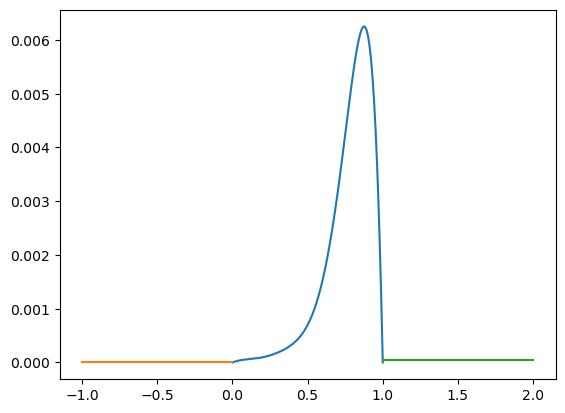

In [45]:
plt.plot(S,r)
plt.plot(s_r,kv)
plt.plot(s_l,kl)

In [ ]:
g_max = 0.00625


In [138]:
d = 100e-6
alpha_sf = 6*(1-e)/d
m = 0.001
m_flux = m / (0.06*0.06*np.pi/4)

lr = 0.9

P = 101325
h = (h_l_sat(P) + h_v_sat(P))/2
history = [h]
for i in range(50):
    T_s = h_to_T(h,P)+0.1
    v = m_flux / rho(h,P)

    q = qsf(h,P,v,T_s,d,alpha_sf)
    dq = dqsfdT(h,P,v,T_s,d,alpha_sf)/(-dlamdS(h,P)*h_fg(P))
    if(h_to_S(h,P)==1):
        g = 0.68 / 4182
    elif(h_to_S(h,P)==0):
        g = k_v(h_to_T(h,P),P) / cp_v(h_to_T(h,P),P)
    else:
        g = gam.subs(s,h_to_S(h,P))

    b = q - dq * h
    a = dq
    dx = 100e-6

    def f(he,hw):
        return -(b*dx-(g/dx+m_flux/2)*he-(g/dx-m_flux/2)*hw)/(2*g/dx+a*dx)

    h = f(h,h) * (1-lr) + lr * h
    history.append(h)

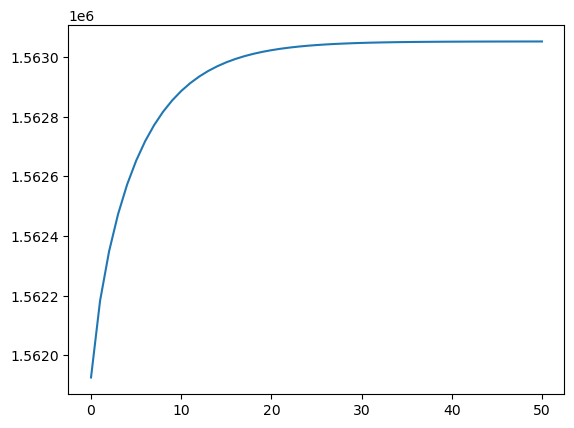

In [139]:
plt.plot(range(51),history)

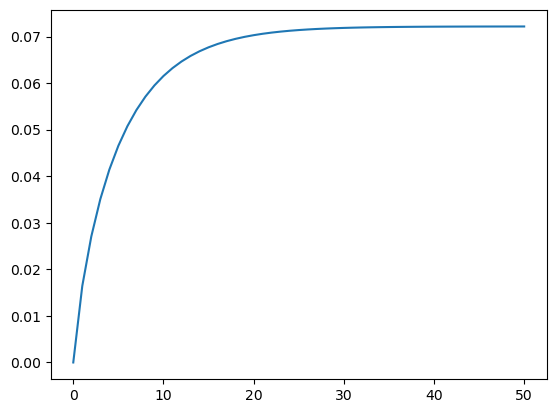

In [141]:
history = np.array(history)
plt.plot(range(51),(history/history[0]-1)*100)

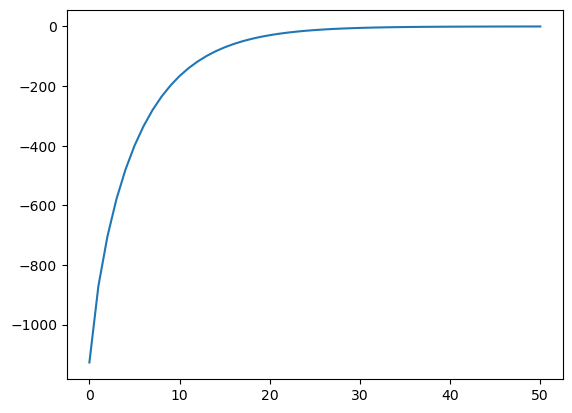

In [143]:
plt.plot(range(51),history-h_v_sat(P))

In [9]:
from sympy import symbols, diff, simplify

In [7]:
x,c = symbols('x c')
y = x**3 / (x**3 + c * (1-x)**3)

In [14]:
dy = simplify(diff(y,x))
dydx = 1/dy
dydx

(c*(x - 1)**3 - x**3)**2/(3*x**2*(-c*(x - 1)**3 + x**3 + x*(c*(x - 1)**2 - x**2)))

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
P = 101325
dydx_c = dydx.subs(c,nu_l(T_sat(P),P)/nu_v(T_sat(P),P))
dydx_c

(-x**3 + 0.0133671138696873*(x - 1)**3)**2/(3*x**2*(x**3 + x*(-x**2 + 0.0133671138696873*(x - 1)**2) - 0.0133671138696873*(x - 1)**3))

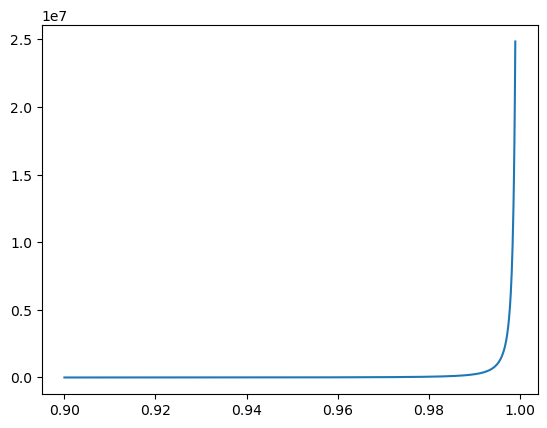

In [26]:
x_d = np.linspace(0.9,0.999,1000)
r = []

for s in x_d:
    r.append(dydx_c.subs(x,s))

plt.plot(x_d,r)

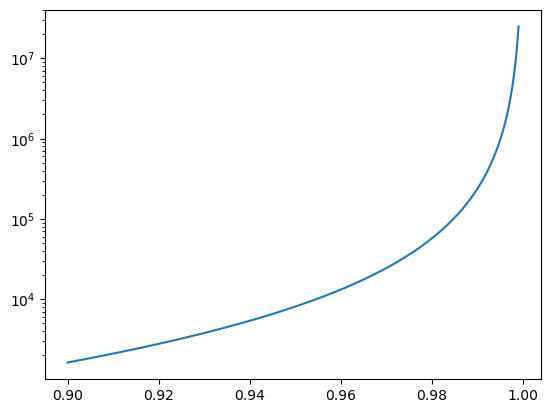

In [27]:
plt.plot(x_d,r)
plt.yscale('log')